In [130]:
import pandas as pd

In [131]:
df = pd.read_csv('study.csv')

In [132]:
df.columns.tolist()

['29/04/2023',
 "gender\nstudent's sex (binary: 'F' - female or 'M' - male)",
 "age\nstudent's age (numeric: from 15 to 22)",
 "adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural)",
 "famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)",
 "Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart)",
 'M_Education',
 'F_education',
 "Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",
 "Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",
 'relationship_breakdown',
 'smoker',
 'avarage_tution_fee_cost',
 'time_spent_with_friends',
 'ssc_result',
 'hsc_result']

In [133]:
df = df.drop('29/04/2023', axis=1)

In [134]:
df = df.rename(columns={
    "gender\nstudent's sex (binary: 'F' - female or 'M' - male)": "gender",
    "age\nstudent's age (numeric: from 15 to 22)": "age",
    "adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural)": "address",
    "famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)": "fam_size",
    "Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart)": "parent_status",
    "Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other": "m_job",
    "Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other": "f_job",
    "M_Education": "m_edu",
    "F_education": "f_edu"
})

In [135]:
df.columns.tolist()

['gender',
 'age',
 'address',
 'fam_size',
 'parent_status',
 'm_edu',
 'f_edu',
 'm_job',
 'f_job',
 'relationship_breakdown',
 'smoker',
 'avarage_tution_fee_cost',
 'time_spent_with_friends',
 'ssc_result',
 'hsc_result']

In [136]:
df['time_spent_with_friends'] = pd.to_numeric(df['time_spent_with_friends'], errors='coerce')
mean_value = int(df['time_spent_with_friends'].mean().round())
df['time_spent_with_friends'] = df['time_spent_with_friends'].fillna(mean_value)
df['time_spent_with_friends'] = df['time_spent_with_friends'].astype(int)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [138]:
df['parent_status'] = df['parent_status'].str.strip()
print(df['parent_status'].value_counts(dropna=False))

df['smoker'] = df['smoker'].str.strip().str.capitalize()
print(df['smoker'].value_counts(dropna=False))

df['relationship_breakdown'] = df['relationship_breakdown'].str.strip().str.capitalize()
print(df['relationship_breakdown'].value_counts(dropna=False))

df['m_job'] = df['m_job'].str.strip().str.capitalize()
print(df['m_job'].value_counts(dropna=False))

df['f_job'] = df['f_job'].str.strip().str.capitalize()
print(df['f_job'].value_counts(dropna=False))

parent_status
T    2028
A      95
Name: count, dtype: int64
smoker
Yes    1063
No     1060
Name: count, dtype: int64
relationship_breakdown
Yes    1232
No      891
Name: count, dtype: int64
m_job
At_home     1095
Other        275
Teacher      273
Services     265
Health       215
Name: count, dtype: int64
f_job
Other       576
Services    521
Teacher     514
Health      487
At_home      25
Name: count, dtype: int64


In [139]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['fam_size'] = df['fam_size'].map({'LE3': 0, 'GT3': 1})
df['parent_status'] = df['parent_status'].map({'T': 1, 'A': 0})
df['relationship_breakdown'] = df['relationship_breakdown'].map({'Yes': 1, 'No': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})

In [140]:
def gpa_to_grade(gpa):
    if gpa >= 5.0:
        return 'A+'
    elif 4.0 <= gpa < 5.0:
        return 'A'
    elif 3.5 <= gpa < 4.0:
        return 'A-'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.0 <= gpa < 3.0:
        return 'C'
    elif 1.0 <= gpa < 2.0:
        return 'D'
    else:
        return 'F'

df['hsc_grade'] = df['hsc_result'].apply(gpa_to_grade)

In [141]:
grade_mapping = {'A+': 6, 'A': 5, 'A-': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['hsc_grade_num'] = df['hsc_grade'].map(grade_mapping)

In [142]:
print(df['hsc_grade'].value_counts())
print(df['hsc_grade'].value_counts(normalize=True))

hsc_grade
A     1923
A-     119
A+      78
B        2
C        1
Name: count, dtype: int64
hsc_grade
A     0.905794
A-    0.056053
A+    0.036740
B     0.000942
C     0.000471
Name: proportion, dtype: float64


In [143]:
# Drop classes with less than 2 samples
class_counts = df['hsc_grade'].value_counts()
valid_classes = class_counts[class_counts > 1].index
df = df[df['hsc_grade'].isin(valid_classes)]

print(df['hsc_grade'].value_counts())

hsc_grade
A     1923
A-     119
A+      78
B        2
Name: count, dtype: int64


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['avarage_tution_fee_cost', 'age']] = scaler.fit_transform(df[['avarage_tution_fee_cost', 'age']])

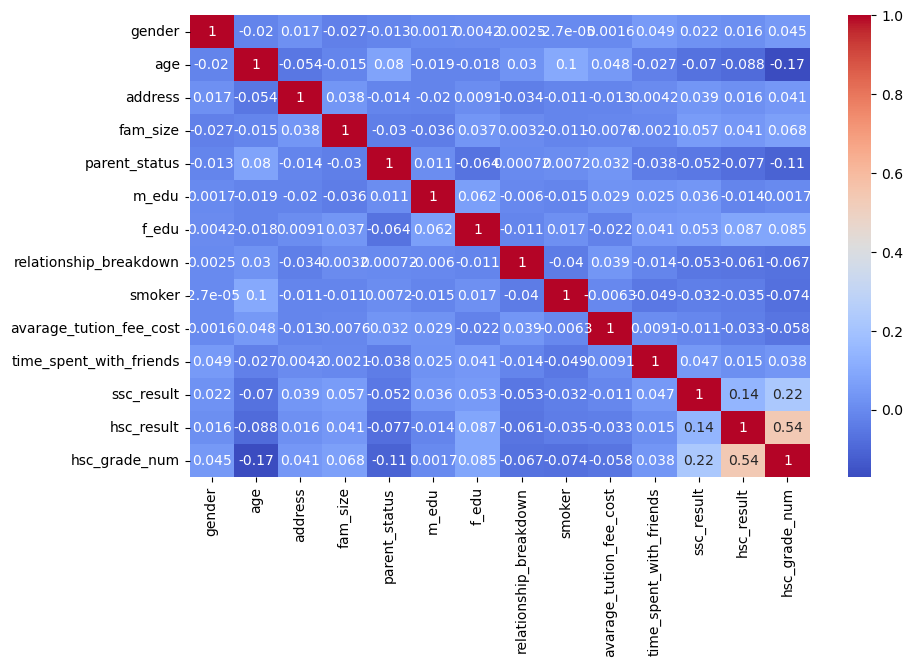

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [146]:
df = df.drop(['m_job', 'f_job', 'hsc_result', 'hsc_grade_num'], axis=1)

X = df.drop('hsc_grade', axis=1)
y = df['hsc_grade']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.93      0.99      0.96       385
          A+       0.83      0.62      0.71        16
          A-       0.00      0.00      0.00        24

    accuracy                           0.92       425
   macro avg       0.59      0.54      0.56       425
weighted avg       0.87      0.92      0.90       425

[[383   2   0]
 [  6  10   0]
 [ 24   0   0]]


In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [148]:
from sklearn.utils import resample

df_major = df[df['hsc_grade'] == 'A']
df_Aplus = df[df['hsc_grade'] == 'A+']
df_Aminus = df[df['hsc_grade'] == 'A-']

df_Aplus_upsampled = resample(df_Aplus, replace=True, n_samples=len(df_major), random_state=42)
df_Aminus_upsampled = resample(df_Aminus, replace=True, n_samples=len(df_major), random_state=42)

df_upsampled = pd.concat([df_major, df_Aplus_upsampled, df_Aminus_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

X = df_upsampled.drop(['hsc_grade', 'm_job', 'f_job', 'hsc_result', 'hsc_grade_num'], axis=1, errors='ignore')
y = df_upsampled['hsc_grade']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, y_train_enc, y_test_enc = train_test_split(
    X, y, y_encoded, test_size=0.2, random_state=42, stratify=y
)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Results:")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train_enc)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb_labels))
print(confusion_matrix(y_test, y_pred_xgb_labels))

Random Forest Results:
              precision    recall  f1-score   support

           A       1.00      0.98      0.99       384
          A+       0.98      1.00      0.99       385
          A-       1.00      1.00      1.00       385

    accuracy                           0.99      1154
   macro avg       0.99      0.99      0.99      1154
weighted avg       0.99      0.99      0.99      1154

[[377   6   1]
 [  0 385   0]
 [  0   0 385]]
AdaBoost Results:
              precision    recall  f1-score   support

           A       0.33      0.26      0.29       384
          A+       0.98      0.76      0.86       385
          A-       0.50      0.72      0.59       385

    accuracy                           0.58      1154
   macro avg       0.60      0.58      0.58      1154
weighted avg       0.60      0.58      0.58      1154

[[ 98   6 280]
 [ 93 292   0]
 [107   0 278]]
XGBoost Results:
              precision    recall  f1-score   support

           A       1.00      0.95